In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplot inline

UsageError: Line magic function `%matplot` not found.


# Data Gathering

In [2]:
data=pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Checking basic info and missing value

In [3]:
data.shape

(1067, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
# Return dataframe after removing duplicate values
data.drop_duplicates(inplace=True)

In [7]:
# count categorical unique value from make column
data['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [8]:
# count categorical unique value from MODEL column
data['MODEL'].value_counts()

F150 FFV                 8
F150 FFV 4X4             8
ACCORD                   6
FOCUS FFV                6
BEETLE                   6
                        ..
Q50 AWD                  1
Q50                      1
SONATA HYBRID LIMITED    1
SONATA HYBRID            1
XC90 AWD                 1
Name: MODEL, Length: 663, dtype: int64

In [9]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [10]:
# count categorical unique value from TRANSMISSION column
data['TRANSMISSION'].value_counts()

A6     222
AS6    189
M6     141
A8      87
AS8     80
AS7     76
M5      48
AV      46
A4      45
AM7     34
A5      30
A7      12
AV6     11
AS5     10
M7       9
A9       8
AM6      6
AV7      5
AV8      3
AS9      2
AM5      2
AS4      1
Name: TRANSMISSION, dtype: int64

In [11]:
# count categorical unique value from FUELTYPE column
data['FUELTYPE'].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [12]:
# count categorical unique value from VEHICLECLASS column
data['VEHICLECLASS'].value_counts()

MID-SIZE                    178
COMPACT                     172
SUV - SMALL                 154
SUV - STANDARD              110
FULL-SIZE                    86
TWO-SEATER                   71
SUBCOMPACT                   65
PICKUP TRUCK - STANDARD      62
MINICOMPACT                  47
STATION WAGON - SMALL        36
VAN - PASSENGER              25
VAN - CARGO                  22
MINIVAN                      14
PICKUP TRUCK - SMALL         12
SPECIAL PURPOSE VEHICLE       7
STATION WAGON - MID-SIZE      6
Name: VEHICLECLASS, dtype: int64

In [13]:
# Excluding MODELYEAR Column because all values are the same 
data.drop(columns=['MODELYEAR'],inplace=True)

# Statistical Analysis

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


# Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [16]:
for col in ['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE']:
    data[col]=encoder.fit_transform(data[col])

# Exploratory Data Analysis (EDA)

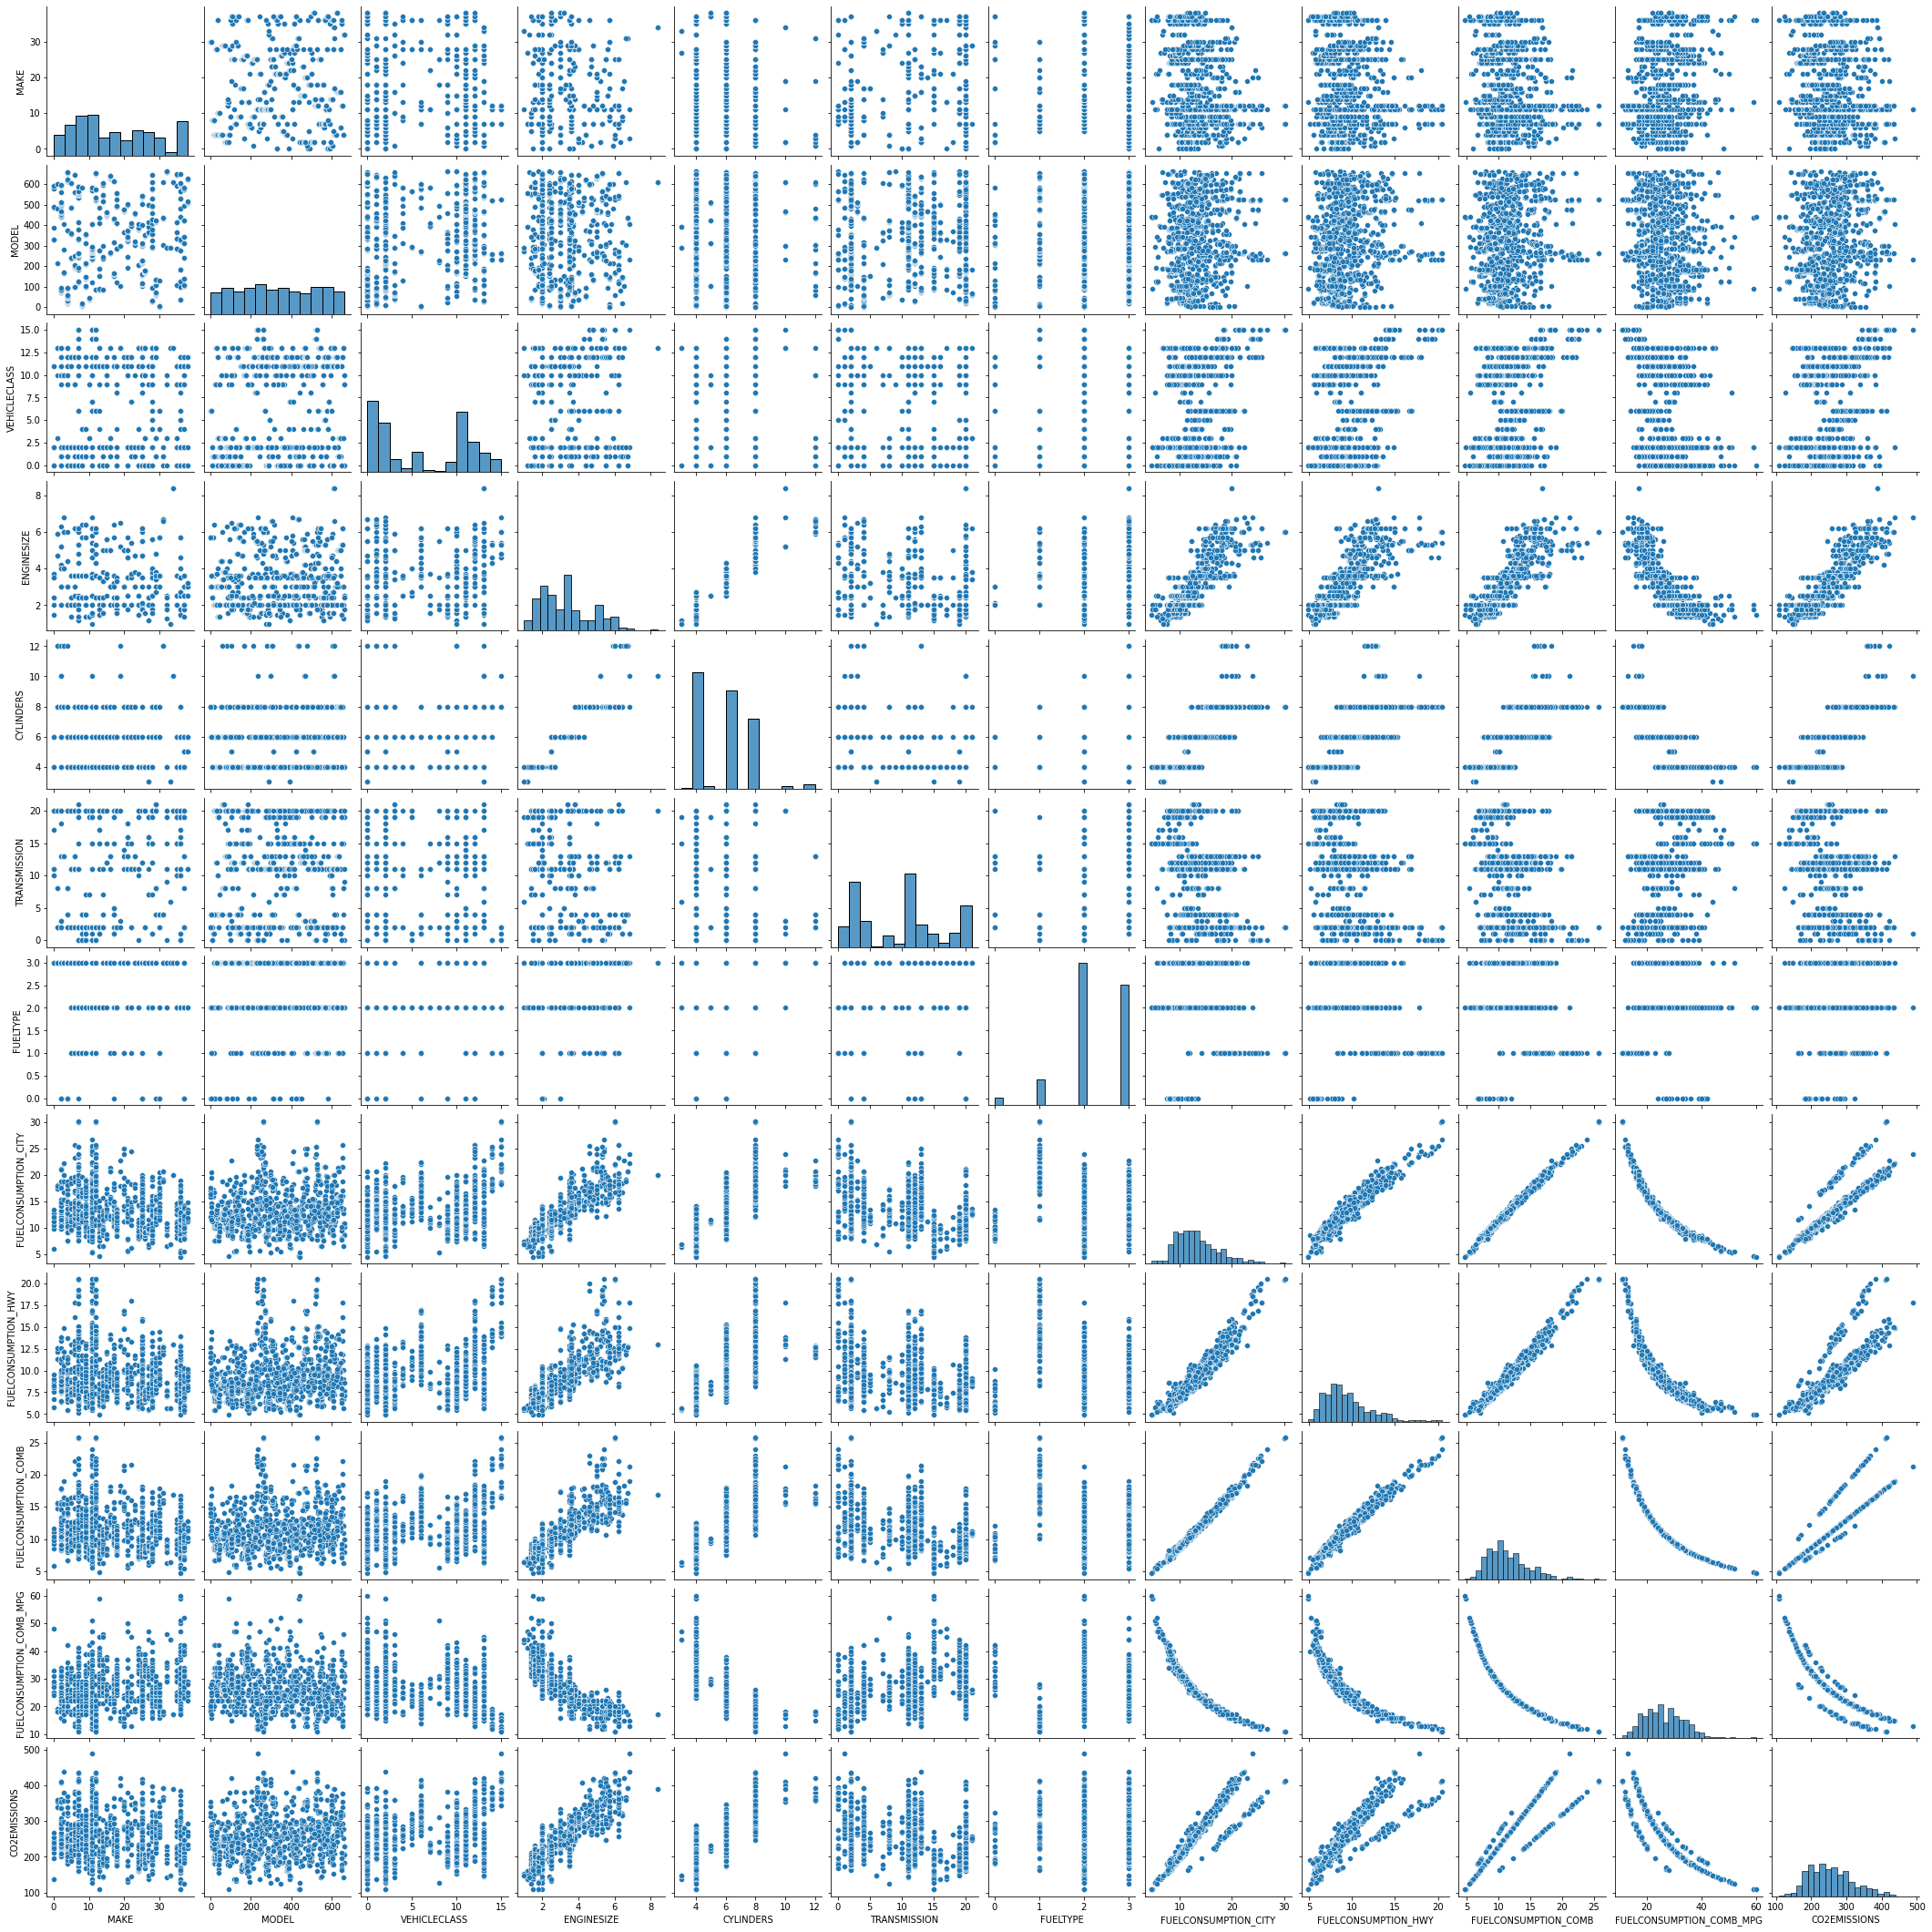

In [17]:
sns.pairplot(data)

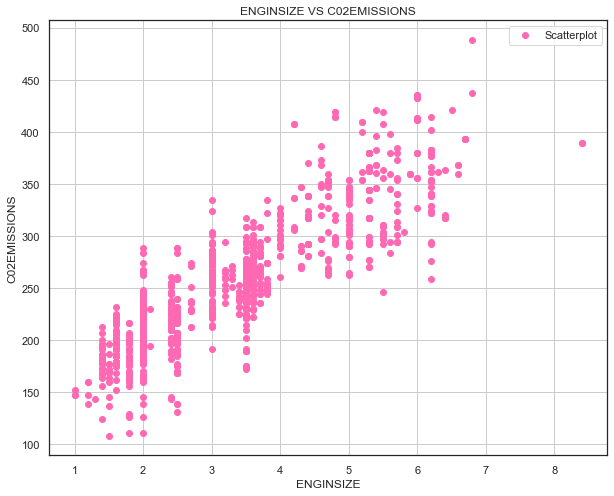

In [102]:
# seatter plot between ENGINSIZE and  C02EMISSIONS
plt.figure(figsize=(10,8))
sns.set(style="white")
plt.scatter(x=data['ENGINESIZE'],y=data['CO2EMISSIONS'],label='Scatterplot',color='hotpink')
plt.xlabel('ENGINSIZE')
plt.ylabel('C02EMISSIONS')
plt.title('ENGINSIZE VS C02EMISSIONS')
plt.legend()
plt.grid()
plt.show()

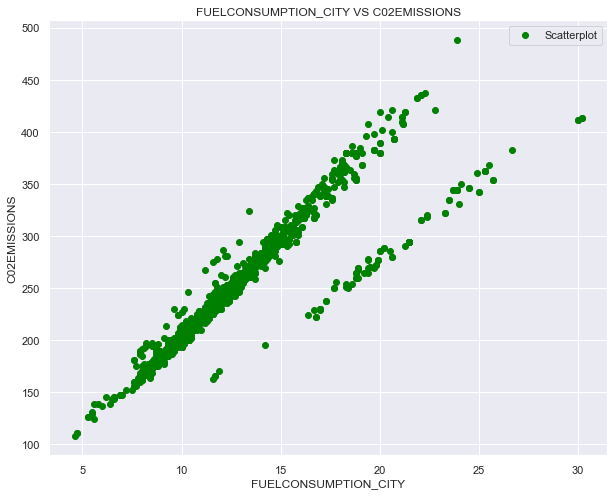

In [101]:
# seatter plot between FUELCONSUMPTION_CITY and  C02EMISSIONS
plt.figure(figsize=(10,8))
sns.set(style="dark")
plt.scatter(x=data['FUELCONSUMPTION_CITY'],y=data['CO2EMISSIONS'],label='Scatterplot',color='green')
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('C02EMISSIONS')
plt.title('FUELCONSUMPTION_CITY VS C02EMISSIONS')
plt.grid()
plt.legend()
plt.show()

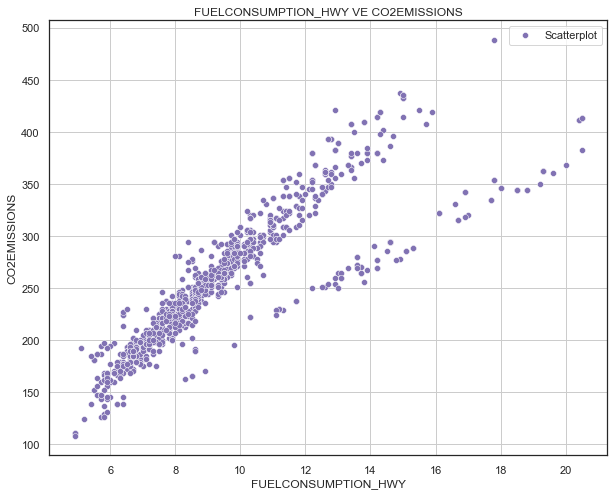

In [98]:
# seatter plot between FUELCONSUMPTION_HWY and  C02EMISSIONS
plt.figure(figsize=(10,8))
sns.scatterplot(x='FUELCONSUMPTION_HWY', y='CO2EMISSIONS', data=data,label='Scatterplot',color='m')
plt.title('FUELCONSUMPTION_HWY VE CO2EMISSIONS')
plt.grid()
plt.legend()
plt.show()

Text(0.5, 1.0, 'FUELCONSUMPTION_COMB VS C02EMISSIONS')

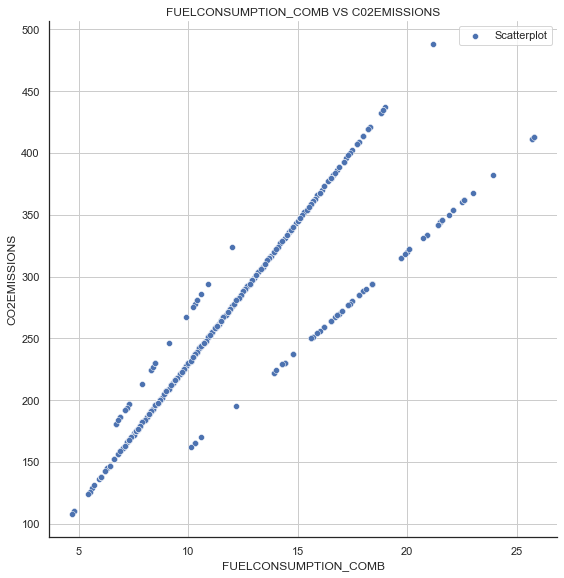

In [97]:
# seatter plot between FUELCONSUMPTION_COMB and  C02EMISSIONS
sns.set(style="white")
sns.relplot(x=data['FUELCONSUMPTION_COMB'],y=data['CO2EMISSIONS'],label='Scatterplot',data=data,height=8)
plt.grid()
plt.legend()
plt.title('FUELCONSUMPTION_COMB VS C02EMISSIONS')

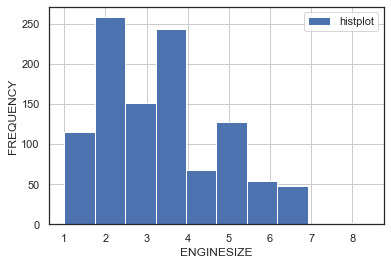

In [103]:
# by this plot we can know the distribution of data over x axis
data['ENGINESIZE'].plot(kind='hist',label='histplot') # hist/bar
plt.xlabel('ENGINESIZE')
plt.ylabel('FREQUENCY')
plt.grid()
plt.legend()
plt.show()

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


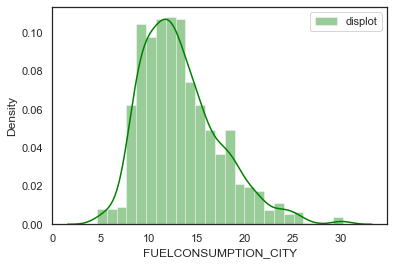

In [104]:
sns.distplot(data['FUELCONSUMPTION_CITY'],label='displot',color='Green' )
plt.legend()

C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


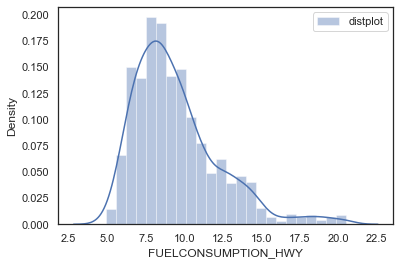

In [110]:
sns.distplot(data.FUELCONSUMPTION_HWY,label='distplot')
plt.legend()

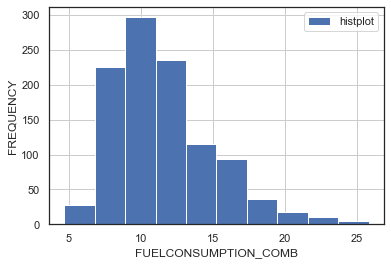

In [112]:
data['FUELCONSUMPTION_COMB'].plot(kind='hist',label='histplot') # hist/bar
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('FREQUENCY')
plt.grid()
plt.legend()
plt.show()

In [108]:
data['FUELCONSUMPTION_CITY'].max()

30.2

In [22]:
sns.__version__

'0.11.2'

In [23]:
data.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,329,0,2.0,4,10,3,9.9,6.7,8.5,33,196
1,0,329,0,2.4,4,20,3,11.2,7.7,9.6,29,221
2,0,330,0,1.5,4,17,3,6.0,5.8,5.9,48,136
3,0,389,11,3.5,6,11,3,12.7,9.1,11.1,25,255
4,0,483,11,3.5,6,11,3,12.1,8.7,10.6,27,244
